# 04 Predict rating

## TODO
- Predict rating fra et random review i en csv fil. compare med rigtigt review OK
- QOL predict all review fra en csv fil. og compare med de rigtige reviews MAYBE?

In [1]:
import fasttext
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
model = fasttext.load_model('./data/fasttext_trained_model.bin')

In [3]:
df = pd.read_csv('./data/' + 'sklearn' + '.csv')

predictedList = []

labelToTest = ['__label__1 ','__label__2 ','__label__3 ','__label__4 ','__label__5 ']

actualLabel1 = []
actualLabel2 = []
actualLabel3 = []
actualLabel4 = []
actualLabel5 = []
totalactual = []

for i in labelToTest:
    if(i == '__label__5 '):
        actualLabel5 = df[df['rating'].isin([i])]
    elif(i == '__label__4 '):
        actualLabel4 = df[df['rating'].isin([i])]
    elif(i == '__label__3 '):
        actualLabel3 = df[df['rating'].isin([i])]
    elif(i == '__label__2 '):
        actualLabel2 = df[df['rating'].isin([i])]
    elif(i == '__label__1 '):
        actualLabel1 = df[df['rating'].isin([i])]
    else:
        print('invalid prediction label')

        
totalactual.append(actualLabel1)
totalactual.append(actualLabel2)
totalactual.append(actualLabel3)
totalactual.append(actualLabel4)
totalactual.append(actualLabel5)
        
for review in range(len(df)):
    predictedReview = model.predict(df['review'][review])
    predictedList.append(str(predictedReview[0]).split("'")[1])
    
predictedLabel1 = []
predictedLabel2 = []
predictedLabel3 = []
predictedLabel4 = []
predictedLabel5 = []  

for i in predictedList:
    if(i == '__label__5'):
        predictedLabel5.append(i) 
    elif(i == '__label__4'):
        predictedLabel4.append(i) 
    elif(i == '__label__3'):
        predictedLabel3.append(i) 
    elif(i == '__label__2'):
        predictedLabel2.append(i) 
    elif(i == '__label__1'):
        predictedLabel1.append(i) 
    else:
        print('invalid prediction label')

amountPredicted = [len(predictedLabel1), len(predictedLabel2), len(predictedLabel3), len(predictedLabel4), len(predictedLabel5)]

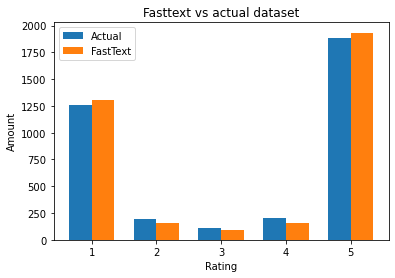

In [4]:
index = np.arange(5)
bar_width = 0.35

my_dict = {"actual":[],"fasttext":[]}
count = 0

for i in np.sort(model.labels):
    my_dict["actual"].append(len(totalactual[count]))
    my_dict["fasttext"].append(amountPredicted[count])
    count = count+1

actualList = []
fasttextList = []
itern = 0
for x in my_dict.items():
    if itern == 0:
        actualList.append(x[1])
    else:
        fasttextList.append(x[1])
    itern = itern+1

    
actualList.sort()
    
cl = []
for i in np.sort(model.labels):
    cl.append(i.replace('__label__',''))

    
fig, ax = plt.subplots()

actual = ax.bar(index, actualList[0], bar_width,
                label="Actual")

fasttext = ax.bar(index+bar_width, fasttextList[0],
                   bar_width, label="FastText")

ax.set_xlabel('Rating')
ax.set_ylabel('Amount')
ax.set_title('Fasttext vs actual dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cl)
ax.legend()

plt.show()

In [5]:
randomIpNumber = random.randint(0,len(df))
actualReview = df['review'][randomIpNumber]
actualRating = df['rating'][randomIpNumber]
predictedReview = model.predict(actualReview,k=-1)
print('Review nr:',randomIpNumber+2)
#print('Det faktiske review, som det står på trustpilot: '+'\n'+actualReview)
zip_iterator = zip(predictedReview[0], predictedReview[1])
mod_dict = dict(zip_iterator)

print('Reviewet har den faktiske rating: '+actualRating)
print('Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig')
for k, v in mod_dict.items():
    print(str(k)+' ' + str(v))


Review nr: 1612
Reviewet har den faktiske rating: __label__5 
Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig
__label__5 0.9972090721130371
__label__1 0.004208795726299286
__label__3 1.0000003385357559e-05
__label__2 1.0000003385357559e-05
__label__4 1.0000003385357559e-05
